In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from keras.callbacks import EarlyStopping

In [2]:
#Importing MNIST dataset from tensorflow keras
(trainval_x, trainval_y), (test_x, test_y) = tensorflow.keras.datasets.mnist.load_data()

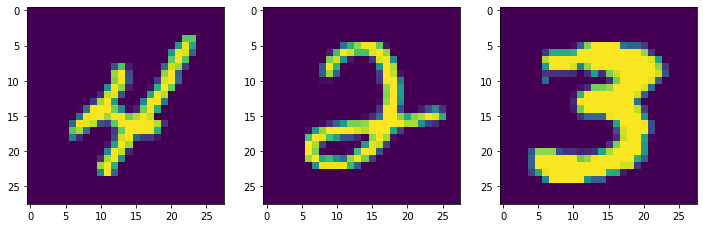

In [3]:
#Plotting certain images from the dataset
fig, axes = plt.subplots(1, 3, figsize = (12, 4))
axes[0].imshow(trainval_x[9])
axes[1].imshow(trainval_x[16])
axes[2].imshow(trainval_x[27])
plt.show()

In [4]:
#Converting the data from utf-8 format to float format
trainval_x = np.float32(trainval_x)
trainval_x

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [5]:
#Converting the test data from utf-8 format to float format
test_x = np.float32(test_x)
test_x

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [6]:
#Creating a validation set from the train dataset
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(trainval_x, trainval_y, test_size = 0.2, random_state = 42)
train_x.shape, val_x.shape, test_x.shape, train_y.shape, val_y.shape, test_y.shape

((48000, 28, 28),
 (12000, 28, 28),
 (10000, 28, 28),
 (48000,),
 (12000,),
 (10000,))

###**Model Training**

In [7]:
#Creating a neural network model with dense layers
nn_model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Flatten(input_shape = (28, 28)),
    tensorflow.keras.layers.Dense(128, activation='relu'),
    tensorflow.keras.layers.Dense(64, activation='relu'),
    tensorflow.keras.layers.Dense(32, activation='relu'),
    tensorflow.keras.layers.Dense(10)
])
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Compiling the model
nn_model.compile(optimizer='adam', loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics='accuracy')
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [9]:
#Fitting the model over the data with early stopping and storing the loss and accuracy values
history = nn_model.fit(train_x, train_y,
                       epochs=100, 
                       validation_data=(val_x, val_y), 
                       callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)])

Epoch 1/100
1500/1500 [==============================] - 5s 3ms/step - loss: 3.2356 - accuracy: 0.7602 - val_loss: 0.3084 - val_accuracy: 0.9218
Epoch 2/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2722 - accuracy: 0.9281 - val_loss: 0.2638 - val_accuracy: 0.9287
Epoch 3/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1900 - accuracy: 0.9462 - val_loss: 0.1957 - val_accuracy: 0.9444
Epoch 4/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1521 - accuracy: 0.9563 - val_loss: 0.1755 - val_accuracy: 0.9528
Epoch 5/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1304 - accuracy: 0.9623 - val_loss: 0.1728 - val_accuracy: 0.9519
Epoch 6/100
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1130 - accuracy: 0.9670 - val_loss: 0.1538 - val_accuracy: 0.9596
Epoch 7/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0905 - accuracy: 0.9739 - val_loss: 0.1707 - val_ac

In [10]:
#Printing the values loss and accuracy values of train and validation dataset
history.history

{'accuracy': [0.8460000157356262,
  0.9294583201408386,
  0.9458749890327454,
  0.9562291502952576,
  0.9613749980926514,
  0.9653124809265137,
  0.9712083339691162,
  0.9742083549499512,
  0.976520836353302,
  0.9782083630561829,
  0.9803541898727417,
  0.9818333387374878,
  0.9827499985694885],
 'loss': [1.1484341621398926,
  0.26697272062301636,
  0.19009189307689667,
  0.1552172303199768,
  0.1369609236717224,
  0.11892452836036682,
  0.10376472026109695,
  0.08874675631523132,
  0.0826866626739502,
  0.0757329985499382,
  0.06938254088163376,
  0.0643245056271553,
  0.058870673179626465],
 'val_accuracy': [0.921750009059906,
  0.9287499785423279,
  0.9444166421890259,
  0.952750027179718,
  0.9519166946411133,
  0.9595833420753479,
  0.9558333158493042,
  0.9672499895095825,
  0.9634166955947876,
  0.968833327293396,
  0.9659166932106018,
  0.9659166932106018,
  0.9698333144187927],
 'val_loss': [0.30841973423957825,
  0.2637854218482971,
  0.19571177661418915,
  0.175506979227066

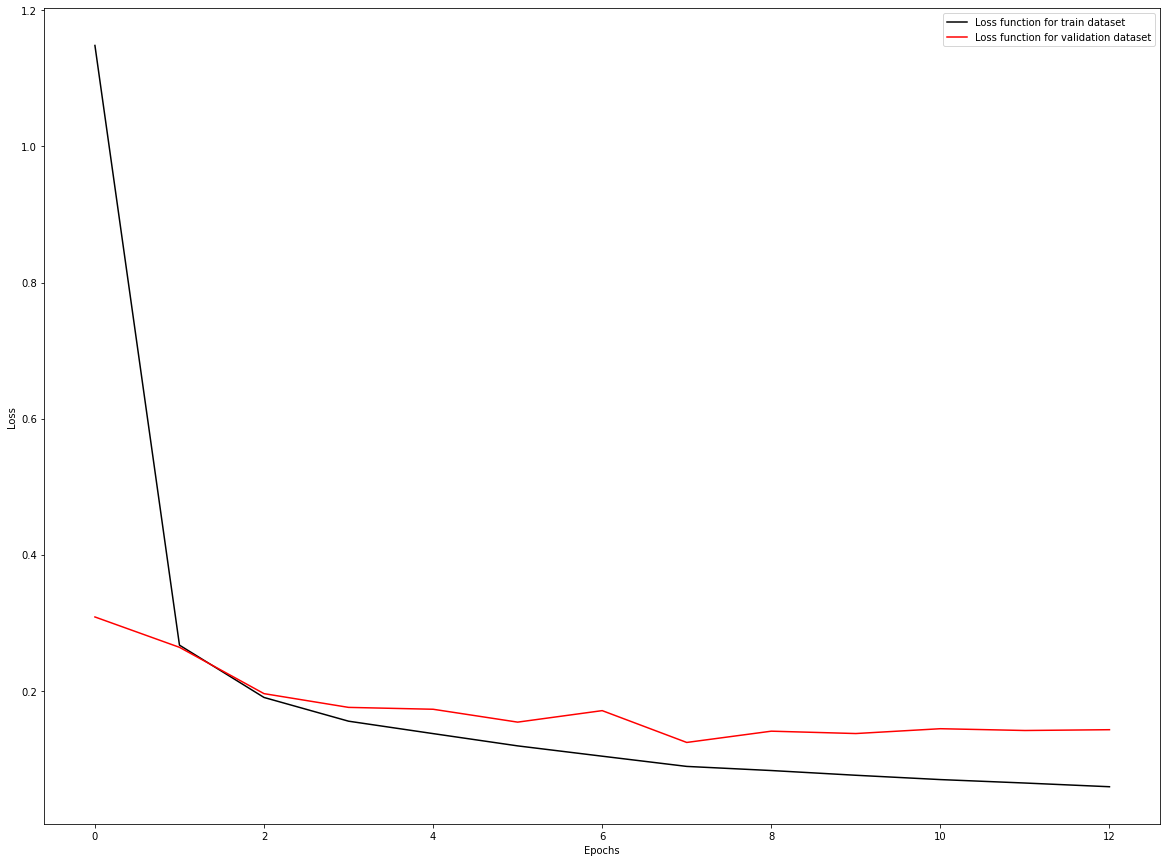

In [11]:
#Plotting the graph for train loss and validation loss
plt.figure(figsize=(20, 15))
plt.plot(history.history['loss'], 'k-', label = 'Loss function for train dataset')
plt.plot(history.history['val_loss'], 'r-', label = 'Loss function for validation dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
#Evaluating the actual model
test_loss, test_accuracy = nn_model.evaluate(test_x, test_y, verbose=2)
test_loss, test_accuracy

313/313 - 1s - loss: 0.1432 - accuracy: 0.9682


(0.14319895207881927, 0.9682000279426575)

###**Making predictions and getting metric values**

In [13]:
#Making predictions on test dataset
predictions = nn_model.predict(test_x)
pred = np.argmax(predictions, axis=1)
pred

array([7, 2, 1, ..., 4, 5, 6])

In [14]:
#Create confusion matrix for Custom CNN Model
from sklearn.metrics import confusion_matrix
nn_cm = confusion_matrix(test_y, pred)
nn_cm

array([[ 973,    0,    2,    0,    0,    0,    1,    2,    2,    0],
       [   0, 1108,    3,    6,    1,    2,    5,    0,   10,    0],
       [   2,    0, 1020,    2,    1,    0,    0,    4,    3,    0],
       [   0,    0,    5,  987,    0,    7,    0,    4,    5,    2],
       [   7,    0,    4,    0,  946,    1,   15,    1,    3,    5],
       [   8,    0,    1,   14,    2,  856,    4,    1,    5,    1],
       [   4,    1,    2,    1,    7,    5,  933,    0,    5,    0],
       [   3,    1,   18,   14,    2,    0,    0,  972,    4,   14],
       [   8,    0,    7,    8,    5,    6,    5,    3,  930,    2],
       [   4,    1,    0,   10,   19,    7,    2,    4,    5,  957]])

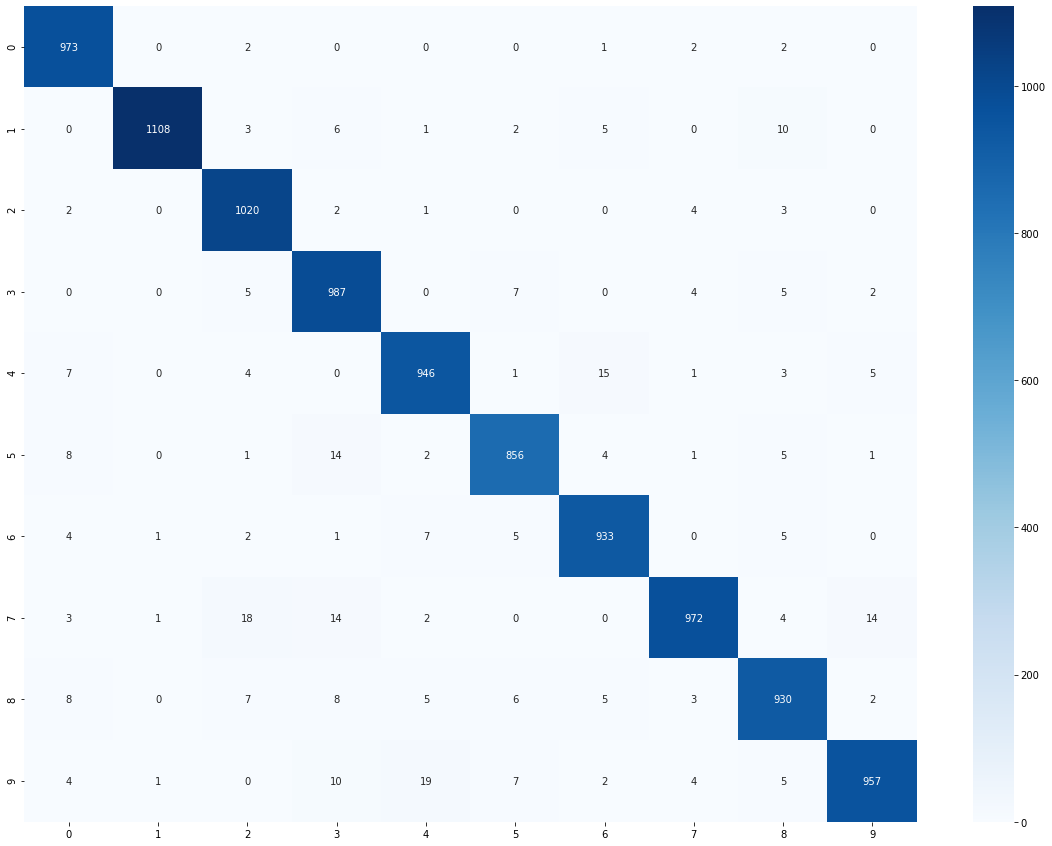

In [15]:
#Creating a confusion matrix for the predicted output
import seaborn as sns
plt.figure(figsize=(20, 15))
axis = plt.subplot(111)
sns.heatmap(nn_cm, ax = axis, cmap = 'Blues', annot = True, square = False, fmt='')

In [16]:
#Calculating accuracy based in the confusion matrix for Custom CNN Model
#Accuracy is calculated by ratio of all true predictions and total number of images 
#Trace function is used to calculate sum of all diagonal value (True predictions)
nn_accuracy = nn_cm.trace()/nn_cm.sum()
print("Accuracy for NN model : ", nn_accuracy)

Accuracy for NN model :  0.9682


In [17]:
#Getting F1 micro score for Custom CNN Model
from sklearn.metrics import f1_score
nn_f1 = f1_score(test_y, pred, average = 'micro')
print("F1 score (micro) for NN model : ", nn_f1)

F1 score (micro) for NN model :  0.9682


In [18]:
#Getting F1 macro score for Custom CNN Model
from sklearn.metrics import f1_score
nn_f1_ma = f1_score(test_y, pred, average = 'macro')
print("F1 score (macro) for NN model : ", nn_f1_ma)

F1 score (macro) for NN model :  0.9678865732188788


In [19]:
#Converting hte test case labels to one hot vectors
from tensorflow.keras.utils import to_categorical
test_y_preds = to_categorical(test_y)
test_y_preds

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
#Converting the model predictions of probability to one hot vectors
a = nn_model.predict_proba(test_x)
a = (a == a.max(axis=1, keepdims=True)).astype(int)
a

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
# Calculating AUC Score using one hot vectors of predictions and actual cases
from sklearn.metrics import roc_auc_score
nn_auc = roc_auc_score(test_y_preds, a,multi_class='ovr', average = 'macro')
print("AUC Score of NN Model:",nn_auc)

AUC Score of NN Model: 0.9822540571663982
